## Predicting Credit Card Approval

### Importing libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn import metrics
import optuna


### Data Exploration

In [3]:
label = pd.read_csv('C:\\Users\\Renju\\PycharmProjects\\pythonProject31\\Data\\application_record.csv',encoding = 'utf-8')
credit = pd.read_csv('C:\\Users\\Renju\\PycharmProjects\\pythonProject31\\Data\\credit_record.csv',encoding = 'utf-8')

In [4]:
df = label.merge(credit, how='inner', on=['ID'])
df.head()

ID CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
0  5008804           M            Y               Y             0   
1  5008804           M            Y               Y             0   
2  5008804           M            Y               Y             0   
3  5008804           M            Y               Y             0   
4  5008804           M            Y               Y             0   

   AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  \
0          427500.0          Working    Higher education     Civil marriage   
1          427500.0          Working    Higher education     Civil marriage   
2          427500.0          Working    Higher education     Civil marriage   
3          427500.0          Working    Higher education     Civil marriage   
4          427500.0          Working    Higher education     Civil marriage   

  NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  FLAG_MOBIL  FLAG_WORK_PHONE  \
0  Rented apartment      -12005          -4542           1                1   
1  Rented apartment      -12005          -4542           1                1   
2  Rented apartment      -12005          -4542           1                1   
3  Rented apartment      -12005          -4542           1                1   
4  Rented apartment      -12005          -4542           1                1   

   FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
0           0           0             NaN              2.0               0   
1           0           0             NaN              2.0              -1   
2           0           0             NaN              2.0              -2   
3           0           0             NaN              2.0              -3   
4           0           0             NaN              2.0              -4   

  STATUS  
0      C  
1      C  
2      C  
3      C  
4      C

### Creating copy of data

In [5]:
credit_card = df.copy()

In [6]:
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [7]:
credit_card.shape

(777715, 20)

In [8]:
label.shape


(438557, 18)

In [9]:
label['ID'].nunique()

438510

In [10]:
credit.shape

(1048575, 3)

In [11]:
credit['ID'].nunique()

45985

In [12]:
#Getting unique values from each features
for i in credit_card.columns:
    print(i,'-',credit_card[i].unique())

ID - [5008804 5008805 5008806 ... 5149838 5150049 5150337]
CODE_GENDER - ['M' 'F']
FLAG_OWN_CAR - ['Y' 'N']
FLAG_OWN_REALTY - ['Y' 'N']
CNT_CHILDREN - [ 0  1  3  2  4  5 14 19  7]
AMT_INCOME_TOTAL - [ 427500.   112500.   270000.   283500.   135000.   130500.   157500.
  405000.   211500.   360000.   126000.   315000.   247500.   297000.
  225000.   166500.   216000.   255150.   148500.   202500.    94500.
  450000.   180000.    90000.   765000.   382500.   144000.   229500.
  292500.    74250.    40500.   337500.   193500.   267750.   139500.
   67500.   252000.   900000.   115290.   279000.    76500.   234000.
   81000.   108000.    99000.   198000.    45000.   238500.   117000.
  153000.  1350000.   445500.   495000.    85500.   306000.   562500.
  189000.   328500.   310500.   540000.   171000.   675000.   121500.
   72000.    65250.   184500.   103500.   162000.   165150.    54000.
  243000.   256500.    33300.   697500.   101250.    58500.   110250.
  472500.   196650.   630000.  

In [13]:
# checking to see how many records match in two
len(set(label['ID']).intersection(set(credit['ID'])))


36457

In [14]:
#Checking for empty cells
credit_card.isnull().sum() * 100 / credit_card.shape[0]

ID                      0.000000
CODE_GENDER             0.000000
FLAG_OWN_CAR            0.000000
FLAG_OWN_REALTY         0.000000
CNT_CHILDREN            0.000000
AMT_INCOME_TOTAL        0.000000
NAME_INCOME_TYPE        0.000000
NAME_EDUCATION_TYPE     0.000000
NAME_FAMILY_STATUS      0.000000
NAME_HOUSING_TYPE       0.000000
DAYS_BIRTH              0.000000
DAYS_EMPLOYED           0.000000
FLAG_MOBIL              0.000000
FLAG_WORK_PHONE         0.000000
FLAG_PHONE              0.000000
FLAG_EMAIL              0.000000
OCCUPATION_TYPE        30.865806
CNT_FAM_MEMBERS         0.000000
MONTHS_BALANCE          0.000000
STATUS                  0.000000
dtype: float64

In [15]:
#Assigning index with client ID
credit_card.index = credit_card ['ID']
credit_card.drop('ID',axis=1,inplace=True)

In [16]:
#Drop Duplicates
credit_card.drop_duplicates(inplace=True)

### Understanding the data

In [17]:
#Initial five rows
credit_card.head()

CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  \
ID                                                               
5008804           M            Y               Y             0   
5008804           M            Y               Y             0   
5008804           M            Y               Y             0   
5008804           M            Y               Y             0   
5008804           M            Y               Y             0   

         AMT_INCOME_TOTAL NAME_INCOME_TYPE NAME_EDUCATION_TYPE  \
ID                                                               
5008804          427500.0          Working    Higher education   
5008804          427500.0          Working    Higher education   
5008804          427500.0          Working    Higher education   
5008804          427500.0          Working    Higher education   
5008804          427500.0          Working    Higher education   

        NAME_FAMILY_STATUS NAME_HOUSING_TYPE  DAYS_BIRTH  DAYS_EMPLOYED  \
ID                                                                        
5008804     Civil marriage  Rented apartment      -12005          -4542   
5008804     Civil marriage  Rented apartment      -12005          -4542   
5008804     Civil marriage  Rented apartment      -12005          -4542   
5008804     Civil marriage  Rented apartment      -12005          -4542   
5008804     Civil marriage  Rented apartment      -12005          -4542   

         FLAG_MOBIL  FLAG_WORK_PHONE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  \
ID                                                                             
5008804           1                1           0           0             NaN   
5008804           1                1           0           0             NaN   
5008804           1                1           0           0             NaN   
5008804           1                1           0           0             NaN   
5008804           1                1           0           0             NaN   

         CNT_FAM_MEMBERS  MONTHS_BALANCE STATUS  
ID                                               
5008804              2.0               0      C  
5008804              2.0              -1      C  
5008804              2.0              -2      C  
5008804              2.0              -3      C  
5008804              2.0              -4      C

In [18]:
#Brief description
credit_card.describe()

CNT_CHILDREN  AMT_INCOME_TOTAL     DAYS_BIRTH  DAYS_EMPLOYED  \
count  468925.000000      4.689250e+05  468925.000000  468925.000000   
mean        0.421415      1.858502e+05  -16158.295521   60224.031389   
std         0.747775      1.009916e+05    4130.224148  138588.126971   
min         0.000000      2.700000e+04  -25152.000000  -15713.000000   
25%         0.000000      1.215000e+05  -19584.000000   -3246.000000   
50%         0.000000      1.575000e+05  -15812.000000   -1610.000000   
75%         1.000000      2.250000e+05  -12724.000000    -398.000000   
max        19.000000      1.575000e+06   -7489.000000  365243.000000   

       FLAG_MOBIL  FLAG_WORK_PHONE     FLAG_PHONE     FLAG_EMAIL  \
count    468925.0    468925.000000  468925.000000  468925.000000   
mean          1.0         0.225379       0.297472       0.089230   
std           0.0         0.417832       0.457146       0.285075   
min           1.0         0.000000       0.000000       0.000000   
25%           1.0         0.000000       0.000000       0.000000   
50%           1.0         0.000000       0.000000       0.000000   
75%           1.0         0.000000       1.000000       0.000000   
max           1.0         1.000000       1.000000       1.000000   

       CNT_FAM_MEMBERS  MONTHS_BALANCE  
count    468925.000000   468925.000000  
mean          2.197081      -20.979513  
std           0.910155       14.680523  
min           1.000000      -60.000000  
25%           2.000000      -32.000000  
50%           2.000000      -19.000000  
75%           3.000000       -8.000000  
max          20.000000        0.000000

In [19]:
#Summary of data
credit_card.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468925 entries, 5008804 to 5150337
Data columns (total 19 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   CODE_GENDER          468925 non-null  object 
 1   FLAG_OWN_CAR         468925 non-null  object 
 2   FLAG_OWN_REALTY      468925 non-null  object 
 3   CNT_CHILDREN         468925 non-null  int64  
 4   AMT_INCOME_TOTAL     468925 non-null  float64
 5   NAME_INCOME_TYPE     468925 non-null  object 
 6   NAME_EDUCATION_TYPE  468925 non-null  object 
 7   NAME_FAMILY_STATUS   468925 non-null  object 
 8   NAME_HOUSING_TYPE    468925 non-null  object 
 9   DAYS_BIRTH           468925 non-null  int64  
 10  DAYS_EMPLOYED        468925 non-null  int64  
 11  FLAG_MOBIL           468925 non-null  int64  
 12  FLAG_WORK_PHONE      468925 non-null  int64  
 13  FLAG_PHONE           468925 non-null  int64  
 14  FLAG_EMAIL           468925 non-null  int64  
 15  OCCUPATION

### Checking unique values

In [20]:
#Getting unique values from each features
for i in credit_card.columns:
    print(i,'-',credit_card[i].unique())

CODE_GENDER - ['M' 'F']
FLAG_OWN_CAR - ['Y' 'N']
FLAG_OWN_REALTY - ['Y' 'N']
CNT_CHILDREN - [ 0  1  3  2  4  5 14 19  7]
AMT_INCOME_TOTAL - [ 427500.   112500.   270000.   283500.   135000.   130500.   157500.
  405000.   211500.   360000.   126000.   315000.   247500.   297000.
  225000.   166500.   216000.   255150.   148500.   202500.    94500.
  450000.   180000.    90000.   765000.   382500.   144000.   229500.
  292500.    74250.    40500.   337500.   193500.   267750.   139500.
   67500.   252000.   900000.   115290.   279000.    76500.   234000.
   81000.   108000.    99000.   198000.    45000.   238500.   117000.
  153000.  1350000.   445500.   495000.    85500.   306000.   562500.
  189000.   328500.   310500.   540000.   171000.   675000.   121500.
   72000.    65250.   184500.   103500.   162000.   165150.    54000.
  243000.   256500.    33300.   697500.   101250.    58500.   110250.
  472500.   196650.   630000.   432000.   257625.   143100.   207000.
  288000.   131400. 

In [21]:
#Type casting
credit_card['CODE_GENDER'] = credit_card['CODE_GENDER'].astype('category')
credit_card['FLAG_OWN_CAR'] = credit_card['FLAG_OWN_CAR'].astype('category')
credit_card['NAME_INCOME_TYPE'] = credit_card['NAME_INCOME_TYPE'].astype('category')
credit_card['FLAG_OWN_REALTY'] = credit_card['FLAG_OWN_REALTY'].astype('category')
credit_card['NAME_EDUCATION_TYPE'] = credit_card['NAME_EDUCATION_TYPE'].astype('category')
credit_card['NAME_FAMILY_STATUS'] = credit_card['NAME_FAMILY_STATUS'].astype('category')
credit_card['NAME_HOUSING_TYPE'] = credit_card['NAME_HOUSING_TYPE'].astype('category')
credit_card['OCCUPATION_TYPE'] = credit_card['OCCUPATION_TYPE'].astype('category')
credit_card['STATUS'] = credit_card['STATUS'].astype('category')
credit_card['FLAG_MOBIL'] = credit_card['FLAG_MOBIL'].astype('category')
credit_card['FLAG_WORK_PHONE'] = credit_card['FLAG_WORK_PHONE'].astype('category')
credit_card['FLAG_PHONE'] = credit_card['FLAG_PHONE'].astype('category')
credit_card['FLAG_EMAIL'] = credit_card['FLAG_EMAIL'].astype('category')

In [22]:
#Getting Age and WorkTerm info
credit_card['AGE']=-(credit_card['DAYS_BIRTH'])/365
credit_card['WORKTERM']=-(credit_card['DAYS_EMPLOYED'])//365

credit_card['WORKTERM']= credit_card['WORKTERM'].replace(-1001,-1)
credit_card.drop(['DAYS_BIRTH','DAYS_EMPLOYED'],axis = 1,inplace=True)

# replacing the value of C,X to numeric value
credit_card['STATUS'].replace({'C': 6, 'X' : 7}, inplace=True)
credit_card['STATUS']=credit_card['STATUS'].astype(int)

In [23]:
credit_card['STATUS'].value_counts(normalize = True)

0    0.399077
6    0.369584
7    0.208492
1    0.017414
5    0.002734
2    0.001659
3    0.000597
4    0.000444
Name: STATUS, dtype: float64

In [24]:
def get_label(status):
    if status in (2,3,4,5):
        return 1  # Risky
    else:
        return 0 # Not Risky

In [25]:
credit_card['LABEL'] = credit_card['STATUS'].apply(get_label)
credit_card['LABEL']=credit_card['LABEL'].astype('category')
credit_card.drop('STATUS',axis = 1,inplace=True)

In [26]:
credit_card['WORKTERM'].unique()

array([12,  3,  8, -1,  2,  4,  5, 19, 14, 13,  7,  6, 17, 29,  1, 15, 11,
        0, 10, 23, 24, 20,  9, 27, 26, 18, 21, 22, 16, 28, 38, 32, 31, 36,
       37, 30, 39, 25, 34, 33, 41, 40, 35, 43, 42], dtype=int64)

<AxesSubplot:xlabel='LABEL', ylabel='count'>

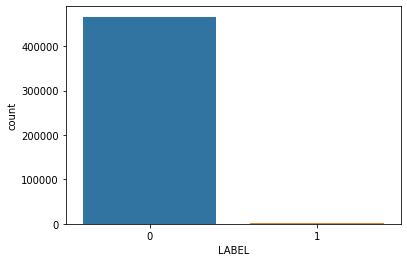

In [27]:
sns.countplot(x=credit_card["LABEL"])

In [28]:
sns.pairplot(credit_card.sample(100))

In [29]:
credit_card1 = credit_card[["CNT_CHILDREN","AMT_INCOME_TOTAL","CNT_FAM_MEMBERS","MONTHS_BALANCE","AGE","WORKTERM"]]
credit_card1

CNT_CHILDREN  AMT_INCOME_TOTAL  CNT_FAM_MEMBERS  MONTHS_BALANCE  \
ID                                                                         
5008804             0          427500.0              2.0               0   
5008804             0          427500.0              2.0              -1   
5008804             0          427500.0              2.0              -2   
5008804             0          427500.0              2.0              -3   
5008804             0          427500.0              2.0              -4   
...               ...               ...              ...             ...   
5150337             0          112500.0              1.0              -9   
5150337             0          112500.0              1.0             -10   
5150337             0          112500.0              1.0             -11   
5150337             0          112500.0              1.0             -12   
5150337             0          112500.0              1.0             -13   

               AGE  WORKTERM  
ID                            
5008804  32.890411        12  
5008804  32.890411        12  
5008804  32.890411        12  
5008804  32.890411        12  
5008804  32.890411        12  
...            ...       ...  
5150337  25.172603         3  
5150337  25.172603         3  
5150337  25.172603         3  
5150337  25.172603         3  
5150337  25.172603         3  

[468925 rows x 6 columns]

In [30]:
credit_card1.skew()

CNT_CHILDREN        2.822807
AMT_INCOME_TOTAL    2.668338
CNT_FAM_MEMBERS     1.438902
MONTHS_BALANCE     -0.483808
AGE                 0.156301
WORKTERM            1.650938
dtype: float64

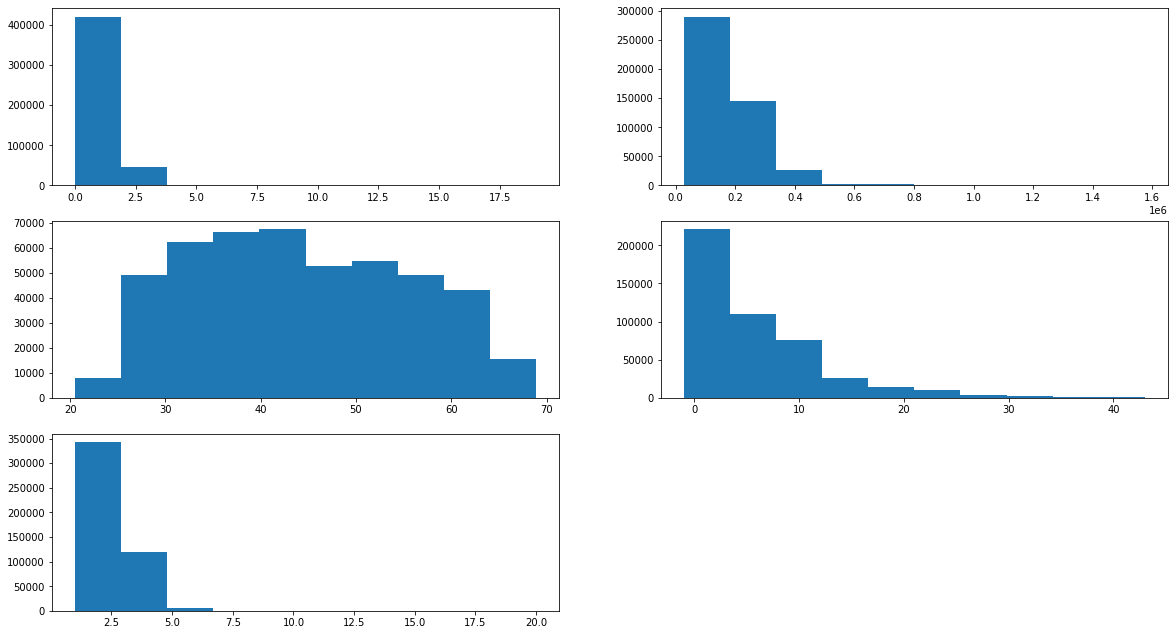

In [31]:
plt.figure(figsize=[20,15])
plt.subplot(4,2,1)
plt.hist(data= credit_card, x='CNT_CHILDREN')
plt.subplot(4,2,2)
plt.hist(data= credit_card, x='AMT_INCOME_TOTAL')
plt.subplot(4,2,3)
plt.hist(data= credit_card, x='AGE')
plt.subplot(4,2,4)
plt.hist(data= credit_card, x='WORKTERM')
plt.subplot(4,2,5)
plt.hist(data= credit_card, x='CNT_FAM_MEMBERS')
plt.show()

In [32]:
import plotly.figure_factory as ff
credit_card1_corr = credit_card1.corr(method='spearman') # Generate correlation matrix for spearman correlation

x = list(credit_card1_corr.columns)
y = list(credit_card1_corr.index)
z = np.array(credit_card1_corr)

fig = ff.create_annotated_heatmap(
    z,
    x = x,
    y = y ,
    annotation_text = np.around(z, decimals=2),
    hoverinfo='z',
    colorscale='jet'
    )
fig.show()

In [33]:
plt.figure(figsize=(5,5))
sns.countplot(x='CODE_GENDER', data=credit_card,hue='LABEL')
plt.title('Distribution of each gender')
plt.show()

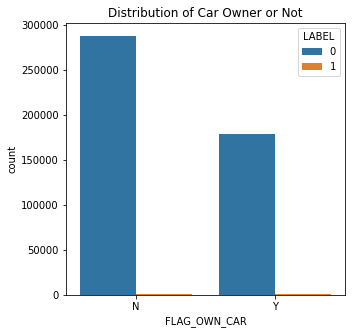

In [34]:
plt.figure(figsize=(5,5))
sns.countplot(x='FLAG_OWN_CAR', data=credit_card,hue='LABEL')
plt.title('Distribution of Car Owner or Not')
plt.show()

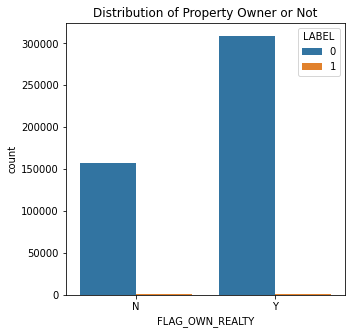

In [35]:
plt.figure(figsize=(5,5))
sns.countplot(x='FLAG_OWN_REALTY', data=credit_card,hue='LABEL')
plt.title('Distribution of Property Owner or Not')
plt.show()

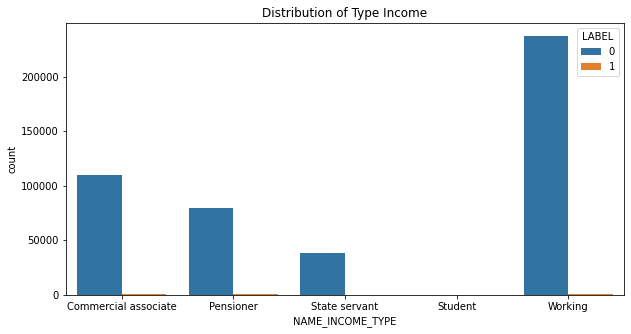

In [36]:
plt.figure(figsize=(10,5))
sns.countplot(x='NAME_INCOME_TYPE', data=credit_card,hue='LABEL')
plt.title('Distribution of Type Income')
plt.show()

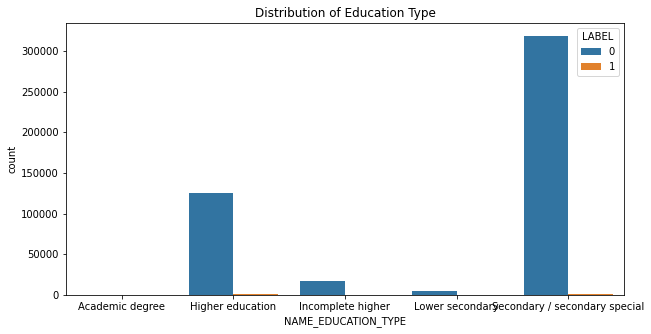

In [37]:
plt.figure(figsize=(10,5))
sns.countplot(x='NAME_EDUCATION_TYPE', data=credit_card,hue='LABEL')
plt.title('Distribution of Education Type')
plt.show()

In [38]:
plt.figure(figsize=(10,5))
sns.countplot(x='NAME_FAMILY_STATUS', data=credit_card,hue='LABEL')
plt.title('Distribution of Marital status')
plt.show()

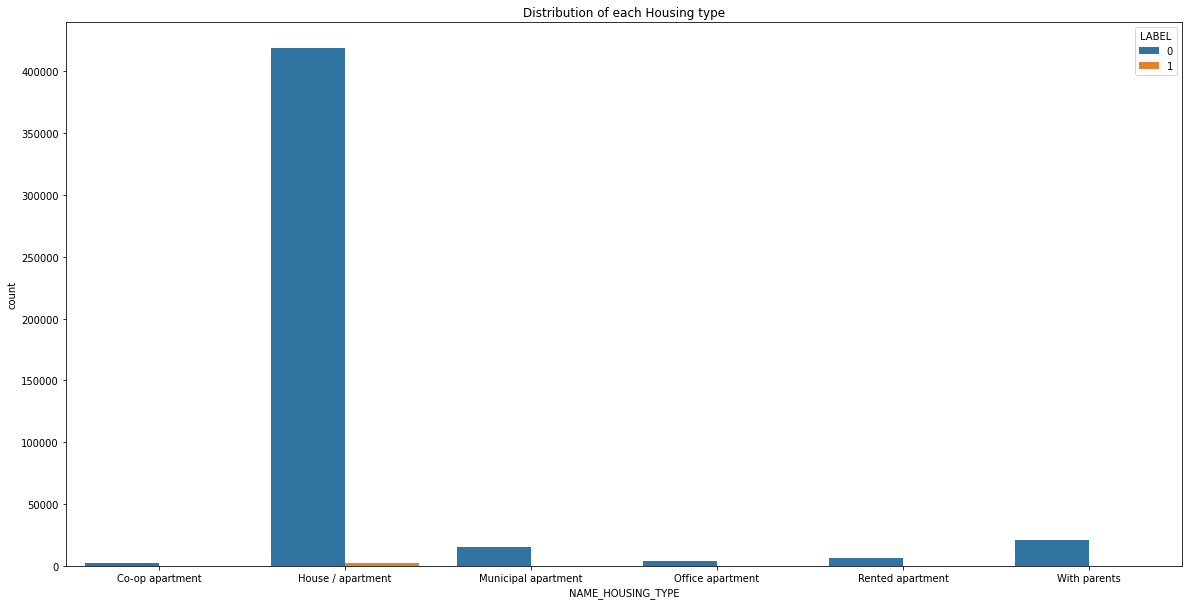

In [39]:
plt.figure(figsize=(20,10))
sns.countplot(x='NAME_HOUSING_TYPE', data=credit_card,hue='LABEL')
plt.title('Distribution of each Housing type')
plt.show()

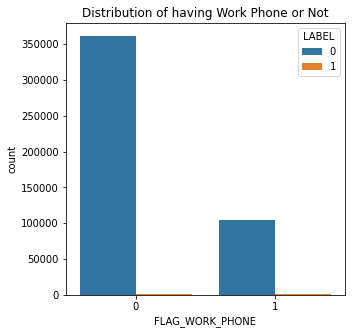

In [40]:
plt.figure(figsize=(5,5))
sns.countplot(x='FLAG_WORK_PHONE', data=credit_card,hue='LABEL')
plt.title('Distribution of having Work Phone or Not')
plt.show()

In [41]:
plt.figure(figsize=(5,5))
sns.countplot(x='FLAG_PHONE', data=credit_card,hue='LABEL')
plt.title('Distribution of having any Phone number or Not')
plt.show()

In [42]:
plt.figure(figsize=(5,5))
sns.countplot(x='FLAG_EMAIL', data=credit_card,hue='LABEL')
plt.title('Distribution of having any EMAIL ID or Not')
plt.show()

In [43]:
plt.figure(figsize=(30,10))
sns.countplot(x='OCCUPATION_TYPE', data=credit_card,hue='LABEL')
plt.title('Distribution of Type of Occupation')
plt.show()

### Data Cleaning

In [44]:
# Now, we remove OCCUPATION_TYPE. As we said, it has too many missed data
# In addition, we will get rid of FLAG_MOBIL, FLAG_WORK_PHONE, FLAG_PHONE and FLAG_EMAIL.
# These parameters do not affect in any way whether a person is creditworthy or not.

In [45]:
credit_card.drop('OCCUPATION_TYPE',inplace=True,axis = 1)

In [46]:
# Dealing with categorical values
credit_card_1 = pd.get_dummies(credit_card,columns=['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE'])

In [47]:
credit_card_1

CNT_CHILDREN  AMT_INCOME_TOTAL FLAG_MOBIL FLAG_WORK_PHONE FLAG_PHONE  \
ID                                                                              
5008804             0          427500.0          1               1          0   
5008804             0          427500.0          1               1          0   
5008804             0          427500.0          1               1          0   
5008804             0          427500.0          1               1          0   
5008804             0          427500.0          1               1          0   
...               ...               ...        ...             ...        ...   
5150337             0          112500.0          1               0          0   
5150337             0          112500.0          1               0          0   
5150337             0          112500.0          1               0          0   
5150337             0          112500.0          1               0          0   
5150337             0          112500.0          1               0          0   

        FLAG_EMAIL  CNT_FAM_MEMBERS  MONTHS_BALANCE        AGE  WORKTERM  ...  \
ID                                                                        ...   
5008804          0              2.0               0  32.890411        12  ...   
5008804          0              2.0              -1  32.890411        12  ...   
5008804          0              2.0              -2  32.890411        12  ...   
5008804          0              2.0              -3  32.890411        12  ...   
5008804          0              2.0              -4  32.890411        12  ...   
...            ...              ...             ...        ...       ...  ...   
5150337          0              1.0              -9  25.172603         3  ...   
5150337          0              1.0             -10  25.172603         3  ...   
5150337          0              1.0             -11  25.172603         3  ...   
5150337          0              1.0             -12  25.172603         3  ...   
5150337          0              1.0             -13  25.172603         3  ...   

        NAME_FAMILY_STATUS_Married  NAME_FAMILY_STATUS_Separated  \
ID                                                                 
5008804                          0                             0   
5008804                          0                             0   
5008804                          0                             0   
5008804                          0                             0   
5008804                          0                             0   
...                            ...                           ...   
5150337                          0                             0   
5150337                          0                             0   
5150337                          0                             0   
5150337                          0                             0   
5150337                          0                             0   

         NAME_FAMILY_STATUS_Single / not married  NAME_FAMILY_STATUS_Widow  \
ID                                                                           
5008804                                        0                         0   
5008804                                        0                         0   
5008804                                        0                         0   
5008804                                        0                         0   
5008804                                        0                         0   
...                                          ...                       ...   
5150337                                        1                         0   
5150337                                        1                         0   
5150337                                        1                         0   
5150337                                        1                         0   
5150337                                        1                         0   

 

In [48]:
credit_card_1.columns

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'FLAG_MOBIL', 'FLAG_WORK_PHONE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE', 'AGE',
       'WORKTERM', 'LABEL', 'CODE_GENDER_F', 'CODE_GENDER_M', 'FLAG_OWN_CAR_N',
       'FLAG_OWN_CAR_Y', 'FLAG_OWN_REALTY_N', 'FLAG_OWN_REALTY_Y',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_INCOME_TYPE_Working', 'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married', 'NAME_FAMILY_STATUS_Widow',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartme

In [49]:
credit_card_1.drop(['CODE_GENDER_M','FLAG_OWN_CAR_Y','FLAG_OWN_REALTY_Y','NAME_INCOME_TYPE_Working','NAME_EDUCATION_TYPE_Secondary / secondary special',
                   'NAME_FAMILY_STATUS_Widow','NAME_HOUSING_TYPE_With parents'],inplace=True,axis = 1)

### Feature Selection

In [50]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
data = credit_card_1
X = credit_card_1.drop(['LABEL'],axis = 1)  #independent variable columns
y = credit_card_1.LABEL    #target variable column (price range)

In [51]:
#extracting top 4 best features by applying SelectKBest class
bestfeatures = SelectKBest(score_func=f_classif, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(30,'Score'))  #printing 15 best features

                                      Specs       Score
9                                  WORKTERM  109.886137
13    NAME_INCOME_TYPE_Commercial associate   80.191562
10                            CODE_GENDER_F   56.627564
27    NAME_HOUSING_TYPE_Municipal apartment   52.761029
21        NAME_FAMILY_STATUS_Civil marriage   50.736470
20      NAME_EDUCATION_TYPE_Lower secondary   48.922410
4                                FLAG_PHONE   44.809822
24  NAME_FAMILY_STATUS_Single / not married   44.453703
18     NAME_EDUCATION_TYPE_Higher education   39.690468
15           NAME_INCOME_TYPE_State servant   38.766561
3                           FLAG_WORK_PHONE   38.634140
26      NAME_HOUSING_TYPE_House / apartment   34.515563
25        NAME_HOUSING_TYPE_Co-op apartment   32.253156
14               NAME_INCOME_TYPE_Pensioner   29.288921
1                          AMT_INCOME_TOTAL   22.638200
12                        FLAG_OWN_REALTY_N   16.162029
22               NAME_FAMILY_STATUS_Married    9

In [52]:
credit_card_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 468925 entries, 5008804 to 5150337
Data columns (total 31 columns):
 #   Column                                   Non-Null Count   Dtype   
---  ------                                   --------------   -----   
 0   CNT_CHILDREN                             468925 non-null  int64   
 1   AMT_INCOME_TOTAL                         468925 non-null  float64 
 2   FLAG_MOBIL                               468925 non-null  category
 3   FLAG_WORK_PHONE                          468925 non-null  category
 4   FLAG_PHONE                               468925 non-null  category
 5   FLAG_EMAIL                               468925 non-null  category
 6   CNT_FAM_MEMBERS                          468925 non-null  float64 
 7   MONTHS_BALANCE                           468925 non-null  int64   
 8   AGE                                      468925 non-null  float64 
 9   WORKTERM                                 468925 non-null  int64   
 10  LABEL        

In [53]:
X = credit_card_1.drop(['FLAG_MOBIL','CNT_CHILDREN','FLAG_EMAIL','FLAG_OWN_CAR_N','MONTHS_BALANCE','CNT_FAM_MEMBERS','AGE','LABEL'],axis = 1)
y = credit_card_1.LABEL

In [54]:
X

AMT_INCOME_TOTAL FLAG_WORK_PHONE FLAG_PHONE  WORKTERM  CODE_GENDER_F  \
ID                                                                              
5008804          427500.0               1          0        12              0   
5008804          427500.0               1          0        12              0   
5008804          427500.0               1          0        12              0   
5008804          427500.0               1          0        12              0   
5008804          427500.0               1          0        12              0   
...                   ...             ...        ...       ...            ...   
5150337          112500.0               0          0         3              0   
5150337          112500.0               0          0         3              0   
5150337          112500.0               0          0         3              0   
5150337          112500.0               0          0         3              0   
5150337          112500.0               0          0         3              0   

         FLAG_OWN_REALTY_N  NAME_INCOME_TYPE_Commercial associate  \
ID                                                                  
5008804                  0                                      0   
5008804                  0                                      0   
5008804                  0                                      0   
5008804                  0                                      0   
5008804                  0                                      0   
...                    ...                                    ...   
5150337                  0                                      0   
5150337                  0                                      0   
5150337                  0                                      0   
5150337                  0                                      0   
5150337                  0                                      0   

         NAME_INCOME_TYPE_Pensioner  NAME_INCOME_TYPE_State servant  \
ID                                                                    
5008804                           0                               0   
5008804                           0                               0   
5008804                           0                               0   
5008804                           0                               0   
5008804                           0                               0   
...                             ...                             ...   
5150337                           0                               0   
5150337                           0                               0   
5150337                           0                               0   
5150337                           0                               0   
5150337                           0                               0   

         NAME_INCOME_TYPE_Student  ...  NAME_EDUCATION_TYPE_Lower secondary  \
ID                                 ...                                        
5008804                         0  ...                                    0   
5008804                         0  ...                                    0   
5008804                         0  ...                                    0   
5008804                         0  ...                                    0   
5008804                         0  ...                                    0   
...                           ...  ...                                  ...   
5150337                         0  ...                                    0   
5150337                         0  ...                                    0   
5150337                         0  ...                                    0   
5150337                         0  ...                                    0   
5150337                         0  ...                                    0   

         NAME_FAMILY_STATUS_Civil marriage  NAME_FAMILY_STATUS_Married  \
ID                             

In [55]:
y

ID
5008804    0
5008804    0
5008804    0
5008804    0
5008804    0
          ..
5150337    0
5150337    1
5150337    0
5150337    0
5150337    0
Name: LABEL, Length: 468925, dtype: category
Categories (2, int64): [0, 1]

### Dealing with Imbalanced data

In [56]:
# Random under-sampling with imblearn

In [57]:
pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Renju\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [58]:
pip install Tensorflow

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Renju\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [59]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\Renju\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [60]:
from imblearn.under_sampling import RandomUnderSampler

In [61]:
rus = RandomUnderSampler(random_state=42, replacement=True)
X_ns,y_ns=rus.fit_resample(X,y)
print("The number of classes before fit {}".format(Counter(y)))
print("The number of classes after fit {}".format(Counter(y_ns)))

The number of classes before fit Counter({0: 466377, 1: 2548})
The number of classes after fit Counter({0: 2548, 1: 2548})


In [62]:
X_ns

AMT_INCOME_TOTAL FLAG_WORK_PHONE FLAG_PHONE  WORKTERM  CODE_GENDER_F  \
ID                                                                              
5041717          315000.0               0          0         2              1   
5048255          450000.0               1          0        12              1   
5045585          153000.0               0          0         0              1   
5116406          179100.0               0          0        -1              1   
5090715           67500.0               0          0         0              1   
...                   ...             ...        ...       ...            ...   
5149838          157500.0               0          1         3              1   
5149838          157500.0               0          1         3              1   
5149838          157500.0               0          1         3              1   
5150049          283500.0               0          0         1              1   
5150337          112500.0               0          0         3              0   

         FLAG_OWN_REALTY_N  NAME_INCOME_TYPE_Commercial associate  \
ID                                                                  
5041717                  0                                      1   
5048255                  0                                      0   
5045585                  0                                      0   
5116406                  0                                      0   
5090715                  1                                      0   
...                    ...                                    ...   
5149838                  0                                      0   
5149838                  0                                      0   
5149838                  0                                      0   
5150049                  0                                      0   
5150337                  0                                      0   

         NAME_INCOME_TYPE_Pensioner  NAME_INCOME_TYPE_State servant  \
ID                                                                    
5041717                           0                               0   
5048255                           0                               0   
5045585                           0                               0   
5116406                           1                               0   
5090715                           0                               0   
...                             ...                             ...   
5149838                           1                               0   
5149838                           1                               0   
5149838                           1                               0   
5150049                           0                               0   
5150337                           0                               0   

         NAME_INCOME_TYPE_Student  ...  NAME_EDUCATION_TYPE_Lower secondary  \
ID                                 ...                                        
5041717                         0  ...                                    0   
5048255                         0  ...                                    0   
5045585                         0  ...                                    0   
5116406                         0  ...                                    0   
5090715                         0  ...                                    0   
...                           ...  ...                                  ...   
5149838                         0  ...                                    0   
5149838                         0  ...                                    0   
5149838                         0  ...                                    0   
5150049                         0  ...                                    0   
5150337                         0  ...                                    0   

         NAME_FAMILY_STATUS_Civil marriage  NAME_FAMILY_STATUS_Married  \
ID                             

In [63]:
X_ns.columns

Index(['AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'WORKTERM',
       'CODE_GENDER_F', 'FLAG_OWN_REALTY_N',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment'],
      dtype='object')

In [64]:
cols = ['AMT_INCOME_TOTAL',
        'FLAG_WORK_PHONE',
        'FLAG_PHONE',
        'WORKTERM',
       'CODE_GENDER_F',
        'FLAG_OWN_REALTY_N',
       'NAME_INCOME_TYPE_Commercial associate',
        'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant',
        'NAME_INCOME_TYPE_Student',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_FAMILY_STATUS_Civil marriage',
        'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment']

In [65]:
y_ns

ID
5041717    0
5048255    0
5045585    0
5116406    0
5090715    0
          ..
5149838    1
5149838    1
5149838    1
5150049    1
5150337    1
Name: LABEL, Length: 5096, dtype: category
Categories (2, int64): [0, 1]

### Splitting of data

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X_ns,y_ns,test_size=0.2, random_state=42)

### Feature Scaling

In [67]:
sc = StandardScaler()
X_train=sc.fit_transform(X_train,)
X_train

array([[-0.543015  ,  1.70747354,  1.43529093, ..., -0.22354919,
        -0.10325715, -0.13122448],
       [-0.89389521, -0.58566061, -0.69672286, ..., -0.22354919,
        -0.10325715, -0.13122448],
       [ 0.99208593, -0.58566061, -0.69672286, ..., -0.22354919,
        -0.10325715, -0.13122448],
       ...,
       [ 0.33418553, -0.58566061, -0.69672286, ..., -0.22354919,
        -0.10325715, -0.13122448],
       [ 2.52718686, -0.58566061,  1.43529093, ..., -0.22354919,
        -0.10325715, -0.13122448],
       [-0.89389521, -0.58566061, -0.69672286, ..., -0.22354919,
        -0.10325715, -0.13122448]])

In [68]:
X_test=sc.transform(X_test)
X_test

array([[ 0.55348566, -0.58566061, -0.69672286, ..., -0.22354919,
        -0.10325715, -0.13122448],
       [-0.543015  , -0.58566061,  1.43529093, ..., -0.22354919,
        -0.10325715, -0.13122448],
       [-0.76231513, -0.58566061, -0.69672286, ..., -0.22354919,
        -0.10325715, -0.13122448],
       ...,
       [ 5.15878845,  1.70747354,  1.43529093, ..., -0.22354919,
        -0.10325715, -0.13122448],
       [-0.76231513, -0.58566061, -0.69672286, ..., -0.22354919,
        -0.10325715, -0.13122448],
       [-0.98161526,  1.70747354,  1.43529093, ..., -0.22354919,
        -0.10325715, -0.13122448]])

In [69]:
X_ns.shape,  X_train.shape, X_test.shape

((5096, 23), (4076, 23), (1020, 23))

In [70]:
X_train.shape, y_train.shape

((4076, 23), (4076,))

In [71]:
X_test.shape, y_test.shape

((1020, 23), (1020,))

## Logistic Regression

In [72]:
logistic_reg=LogisticRegression(random_state = 0)

In [73]:
logistic_reg.fit(X_train,y_train)

LogisticRegression(random_state=0)

### Model evaluation

In [74]:
# accuracy score on the test data
X_test_prediction =logistic_reg.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, y_test)
print('Accuracy score of test data : ',test_data_accuracy)

Accuracy score of test data :  0.6098039215686275


In [75]:
logistic_reg_pred=logistic_reg.predict(X_test)


In [76]:
print('Accuracy Score is {:.3}'.format(accuracy_score(y_test, X_test_prediction)))
print('F1 Score is {:.3}'.format(f1_score(y_test, X_test_prediction)))
print('Precision Score is {:.3}'.format(precision_score(y_test, X_test_prediction)))
print('Recall Score is {:.3}'.format(recall_score(y_test, X_test_prediction)))


Accuracy Score is 0.61
F1 Score is 0.599
Precision Score is 0.596
Recall Score is 0.601


In [77]:
confusion_mat=confusion_matrix(y_test, logistic_reg_pred)
confusion_mat

array([[325, 201],
       [197, 297]], dtype=int64)

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test, logistic_reg_pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62       526
           1       0.60      0.60      0.60       494

    accuracy                           0.61      1020
   macro avg       0.61      0.61      0.61      1020
weighted avg       0.61      0.61      0.61      1020



In [79]:
auc = metrics.roc_auc_score(y_test, logistic_reg_pred)
auc

0.6095426486661227

In [80]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, logistic_reg_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for Logistic Regression")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [81]:
#import joblib

In [82]:
# joblib.dump(logistic_reg, 'credit_card_model.logistic')

## Random forest 

In [83]:
classifier= RandomForestClassifier(n_estimators= 10, criterion="entropy")
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

### Model evaluation

In [84]:
# accuracy score on the test data
X_test_prediction =classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, y_test)
print('Accuracy score of test data : ',test_data_accuracy)

Accuracy score of test data :  0.9058823529411765


In [85]:
#Predicting the test set result
y_pred= classifier.predict(X_test)


In [86]:
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, X_test_prediction)))
print('F1 Score is {:.5}'.format(f1_score(y_test, X_test_prediction)))
print('Precision Score is {:.5}'.format(precision_score(y_test, X_test_prediction)))
print('Recall Score is {:.5}'.format(recall_score(y_test, X_test_prediction)))

Accuracy Score is 0.90588
F1 Score is 0.90438
Precision Score is 0.8902
Recall Score is 0.91903


In [87]:
#Creating the Confusion matrix
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred)
cm

array([[470,  56],
       [ 40, 454]], dtype=int64)

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       526
           1       0.89      0.92      0.90       494

    accuracy                           0.91      1020
   macro avg       0.91      0.91      0.91      1020
weighted avg       0.91      0.91      0.91      1020



In [89]:
auc = metrics.roc_auc_score(y_test, y_pred)
auc

0.9062822308769878

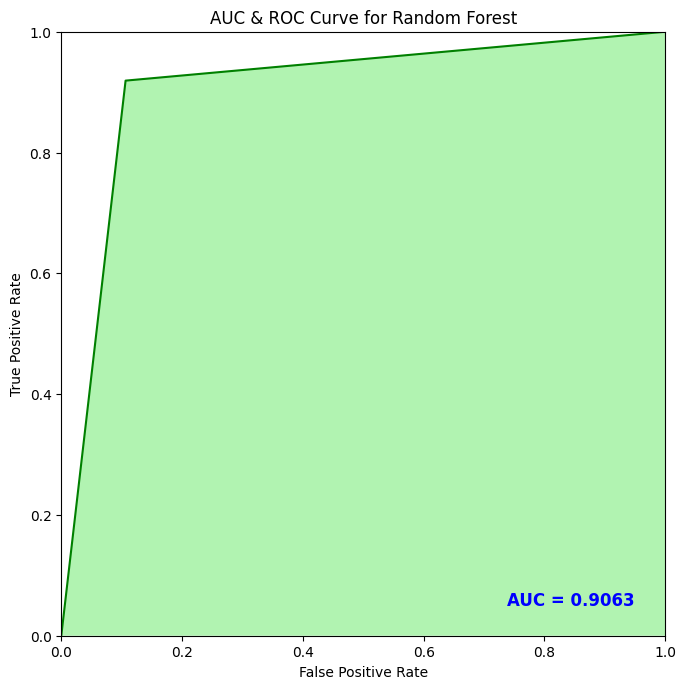

In [90]:
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(10, 8), dpi=100)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve for Random Forest")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [91]:
# import joblib

# joblib.dump(classifier, 'credit_card_model.randomforest')

### Hyperparameter Tuning using Optuna

In [92]:
def rf_classifier_optuna (trial,X_train=X_train,X_test=X_test,y_train=y_train,y_test=y_test):
    #define parameters
    params = {
    'n_estimators'     : trial.suggest_int('n_estimators', 2, 20),
    'max_depth'         : int(trial.suggest_loguniform('max_depth', 1, 32))
    }
        #creat model anf pass parameters
    classifier= RandomForestClassifier(**params)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    return acc

In [93]:
study = optuna.create_study(direction="maximize")
# #start serach
study.optimize(rf_classifier_optuna, n_trials=200)

print("Number of finished trials: ", len(study.trials))
print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
params = []
for key, value in trial.params.items():
    params.append(value)
    print("    {}: {}".format(key, value))

[I 2023-09-12 23:40:51,340] A new study created in memory with name: no-name-83caaa06-fa55-4f4c-9e95-ddff37f0d32f
[I 2023-09-12 23:40:51,340] Trial 0 finished with value: 0.5813725490196079 and parameters: {'n_estimators': 2, 'max_depth': 1.999573143839852}. Best is trial 0 with value: 0.5813725490196079.
[I 2023-09-12 23:40:51,372] Trial 1 finished with value: 0.6362745098039215 and parameters: {'n_estimators': 19, 'max_depth': 3.154811295537377}. Best is trial 1 with value: 0.6362745098039215.
[I 2023-09-12 23:40:51,403] Trial 2 finished with value: 0.6882352941176471 and parameters: {'n_estimators': 18, 'max_depth': 5.564067128508745}. Best is trial 2 with value: 0.6882352941176471.
[I 2023-09-12 23:40:51,403] Trial 3 finished with value: 0.5833333333333334 and parameters: {'n_estimators': 3, 'max_depth': 2.268949369342413}. Best is trial 2 with value: 0.6882352941176471.
[I 2023-09-12 23:40:51,434] Trial 4 finished with value: 0.6441176470588236 and parameters: {'n_estimators': 18,

Number of finished trials:  200
Best trial:
  Value: 0.903921568627451
  Params: 
    n_estimators: 12
    max_depth: 29.79268610763018


In [94]:
classifier= RandomForestClassifier(n_estimators= 250,max_depth= 29)
classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=29, n_estimators=250)

In [95]:
# accuracy score on the test data
X_test_prediction =classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction, y_test)
print('Accuracy score of test data : ',test_data_accuracy)

Accuracy score of test data :  0.8960784313725491


In [96]:
#Predicting the test set result
y_pred= classifier.predict(X_test)

In [97]:
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, X_test_prediction)))
print('F1 Score is {:.5}'.format(f1_score(y_test, X_test_prediction)))
print('Precission Score is {:.5}'.format(precision_score(y_test, X_test_prediction)))
print('Recall Score is {:.5}'.format(recall_score(y_test, X_test_prediction)))

Accuracy Score is 0.89608
F1 Score is 0.89442
Precission Score is 0.88039
Recall Score is 0.90891


In [98]:
cm= confusion_matrix(y_test, y_pred)
cm

array([[465,  61],
       [ 45, 449]], dtype=int64)

In [99]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.88      0.90       526
           1       0.88      0.91      0.89       494

    accuracy                           0.90      1020
   macro avg       0.90      0.90      0.90      1020
weighted avg       0.90      0.90      0.90      1020



### Comparison chart of the two models

In [100]:
from sklearn.metrics import roc_curve

# model build for different binary classification and show confusion matrix
def build_model(model_name,train_X, train_Y, test_X, test_Y):
   if model_name == 'LogisticRegression':
       model=LogisticRegression()
   elif model_name =='RandomForestClassifier':
       model = RandomForestClassifier(n_estimators= 10, criterion="entropy")
   else:
       print('not a valid model name')
   model=model.fit(X_train,y_train)
   pred_prob=model.predict_proba(X_test)
   fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)
   model_predict= model.predict(X_test)
   acc=accuracy_score(model_predict,y_test)
   print("Accuracy: ",acc)
   # Classification report
   print("Classification Report: ")
   print(classification_report(model_predict,y_test))
   #print("Confusion Matrix for", model_name)
   con =  confusion_matrix(model_predict,y_test)
   sns.heatmap(con,annot=True, fmt ='.2f')
   plt.suptitle('Confusion Matrix for '+model_name, x=0.44, y=1.0, ha='center', fontsize=22)
   plt.xlabel('Predict Values', fontsize =22)
   plt.ylabel('Test Values', fontsize =22)
   plt.show()
   return model, acc, fpr, tpr, thresh

Accuracy:  0.6098039215686275
Classification Report: 
              precision    recall  f1-score   support

           0       0.62      0.62      0.62       522
           1       0.60      0.60      0.60       498

    accuracy                           0.61      1020
   macro avg       0.61      0.61      0.61      1020
weighted avg       0.61      0.61      0.61      1020



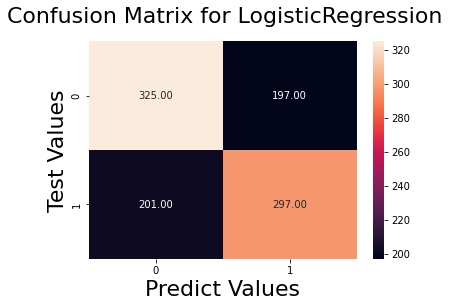

In [101]:
lg_model,acc1, fpr1, tpr1, thresh1 = build_model('LogisticRegression',X_train, y_train, X_test, y_test.values.ravel())

In [102]:
rf_model,acc2, fpr2, tpr2, thresh2 = build_model('RandomForestClassifier',X_train, y_train, X_test, y_test.values.ravel())

Accuracy:  0.8872549019607843
Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.92      0.89       495
           1       0.91      0.86      0.89       525

    accuracy                           0.89      1020
   macro avg       0.89      0.89      0.89      1020
weighted avg       0.89      0.89      0.89      1020



In [103]:
# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [104]:
# Plotting ROC curve

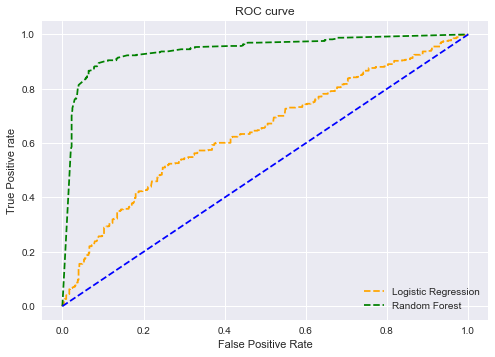

In [105]:
plt.style.use('seaborn')
# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='orange', label='Logistic Regression')
plt.plot(fpr2, tpr2, linestyle='--',color='green', label='Random Forest')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()

In [106]:
# This is the graph showing by the ROC plot is Random Forest Compared to Logistic Regression, 
# the (TPR) True Positive Rate is higher.

In [107]:
results=pd.DataFrame({'Model':['LogisticRegression','Random forest'],
                    'Accuracy Score':[acc1,acc2]})
result_df=results.sort_values(by='Accuracy Score', ascending=False)
result_df=result_df.set_index('Model')
result_df

Accuracy Score
Model                             
Random forest             0.887255
LogisticRegression        0.609804

In [108]:
# The above implementation helps us to identify which machine learning model is best.The basic structure of the data 
# was analyzed with Exploratory Data Analysis. Here I gathered the accuracy metrics of each model and made a 
# comparison table that shows the overall accuracies of each model. The Random Forest model is the best of 
# the two machine learning models with an accuracy of 89 percent. The Logistic Regression got a score of 60 percent.

### Determine feature importance values

In [109]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=250,random_state=1)
#forest = RandomForestClassifier(random_state=0)

In [110]:
X_train = pd.DataFrame(X_train, columns=cols)
X_test = pd.DataFrame(X_test, columns=cols)

In [111]:
X_train.shape

(4076, 23)

In [112]:
# Train the mode

forest.fit(X_train,y_train.values.ravel())

RandomForestClassifier(n_estimators=250, random_state=1)

In [113]:
importances = pd.Series(forest.feature_importances_,index=X_train.columns)

In [114]:
sorted_indices = np.argsort(importances)[::-1]
sorted_indices

NAME_HOUSING_TYPE_Rented apartment          0
NAME_HOUSING_TYPE_Office apartment          3
NAME_HOUSING_TYPE_Municipal apartment       5
NAME_HOUSING_TYPE_House / apartment        11
NAME_HOUSING_TYPE_Co-op apartment           2
NAME_FAMILY_STATUS_Single / not married     4
NAME_FAMILY_STATUS_Separated                6
NAME_FAMILY_STATUS_Married                  1
NAME_FAMILY_STATUS_Civil marriage          15
NAME_EDUCATION_TYPE_Lower secondary        17
NAME_EDUCATION_TYPE_Incomplete higher       7
NAME_EDUCATION_TYPE_Higher education       19
NAME_EDUCATION_TYPE_Academic degree        16
NAME_INCOME_TYPE_Student                   12
NAME_INCOME_TYPE_State servant             14
NAME_INCOME_TYPE_Pensioner                  8
NAME_INCOME_TYPE_Commercial associate      20
FLAG_OWN_REALTY_N                          13
CODE_GENDER_F                              22
WORKTERM                                   18
FLAG_PHONE                                 21
FLAG_WORK_PHONE                   

In [115]:
print(importances)

AMT_INCOME_TOTAL                           0.345784
FLAG_WORK_PHONE                            0.032885
FLAG_PHONE                                 0.041428
WORKTERM                                   0.237699
CODE_GENDER_F                              0.040229
FLAG_OWN_REALTY_N                          0.048694
NAME_INCOME_TYPE_Commercial associate      0.034747
NAME_INCOME_TYPE_Pensioner                 0.018733
NAME_INCOME_TYPE_State servant             0.014494
NAME_INCOME_TYPE_Student                   0.000000
NAME_EDUCATION_TYPE_Academic degree        0.000000
NAME_EDUCATION_TYPE_Higher education       0.042513
NAME_EDUCATION_TYPE_Incomplete higher      0.014951
NAME_EDUCATION_TYPE_Lower secondary        0.009805
NAME_FAMILY_STATUS_Civil marriage          0.014540
NAME_FAMILY_STATUS_Married                 0.027564
NAME_FAMILY_STATUS_Separated               0.015287
NAME_FAMILY_STATUS_Single / not married    0.020051
NAME_HOUSING_TYPE_Co-op apartment          0.003159
NAME_HOUSING

In [116]:
print(X_train)

      AMT_INCOME_TOTAL  FLAG_WORK_PHONE  FLAG_PHONE  WORKTERM  CODE_GENDER_F  \
0            -0.543015         1.707474    1.435291 -0.615938       0.773989   
1            -0.893895        -0.585661   -0.696723 -0.932888       0.773989   
2             0.992086        -0.585661   -0.696723 -0.615938       0.773989   
3            -0.323715        -0.585661    1.435291  0.176438       0.773989   
4             3.842988        -0.585661   -0.696723 -0.457463       0.773989   
...                ...              ...         ...       ...            ...   
4071          0.772786        -0.585661    1.435291 -0.774413       0.773989   
4072          1.430686        -0.585661   -0.696723  1.444238      -1.292009   
4073          0.334186        -0.585661   -0.696723  0.810338       0.773989   
4074          2.527187        -0.585661    1.435291 -0.615938      -1.292009   
4075         -0.893895        -0.585661   -0.696723  1.444238      -1.292009   

      FLAG_OWN_REALTY_N  NAME_INCOME_TY

In [117]:
print(X_train.columns)

Index(['AMT_INCOME_TOTAL', 'FLAG_WORK_PHONE', 'FLAG_PHONE', 'WORKTERM',
       'CODE_GENDER_F', 'FLAG_OWN_REALTY_N',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Pensioner',
       'NAME_INCOME_TYPE_State servant', 'NAME_INCOME_TYPE_Student',
       'NAME_EDUCATION_TYPE_Academic degree',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Incomplete higher',
       'NAME_EDUCATION_TYPE_Lower secondary',
       'NAME_FAMILY_STATUS_Civil marriage', 'NAME_FAMILY_STATUS_Married',
       'NAME_FAMILY_STATUS_Separated',
       'NAME_FAMILY_STATUS_Single / not married',
       'NAME_HOUSING_TYPE_Co-op apartment',
       'NAME_HOUSING_TYPE_House / apartment',
       'NAME_HOUSING_TYPE_Municipal apartment',
       'NAME_HOUSING_TYPE_Office apartment',
       'NAME_HOUSING_TYPE_Rented apartment'],
      dtype='object')


### Visualize the feature importance

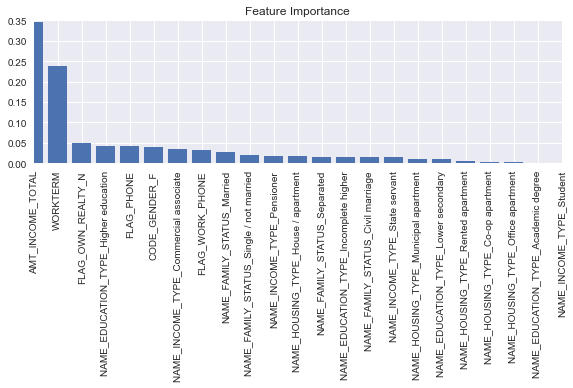

In [118]:
import matplotlib.pyplot as plt

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[sorted_indices], align='center')
plt.xticks(range(X_train.shape[1]), X_train.columns[sorted_indices], rotation=90)
plt.tight_layout()
plt.xlim(0, 22)
plt.ylim(0, 0.350)
plt.show()

### Making a predictive system

### Trial-1 for ID = 5149838

In [119]:
input_data =(157500.0, 0, 1, 3, True, False, False, True, False, False, False, True, False, False, False, True, False, False, False, True, False, False, False)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = sc.transform(input_data_reshaped)
print(std_data)


[[-0.32371487 -0.58566061  1.43529093 -0.29898759  0.77398867 -0.74467343
  -0.61364646  2.02361063 -0.25398367  0.          0.          1.55270044
  -0.20926063 -0.13784049 -0.24957613  0.69245349 -0.26422769 -0.42435959
  -0.08012336  0.36405606 -0.22354919 -0.10325715 -0.13122448]]


In [120]:
prediction = classifier.predict(std_data)
print(prediction)

[1]


In [121]:
if (prediction[0] == 0):
    print(" Credit card is approved")
else:
    print("Credit card is not approved")

Credit card is not approved


### Trial-2 for ID = 5041717

In [122]:
input_data =(315000.0, 0, 0, 2, True, False, True, False, False, False, False, True, False, False, False, True, False, False, False, True, False, False, False)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = sc.transform(input_data_reshaped)
print(std_data)

[[ 1.21138606 -0.58566061 -0.69672286 -0.45746267  0.77398867 -0.74467343
   1.62960283 -0.49416621 -0.25398367  0.          0.          1.55270044
  -0.20926063 -0.13784049 -0.24957613  0.69245349 -0.26422769 -0.42435959
  -0.08012336  0.36405606 -0.22354919 -0.10325715 -0.13122448]]


In [123]:
prediction = classifier.predict(std_data)
print(prediction)

[0]


In [124]:
if (prediction[0] == 0):
    print(" Credit card is approved")
else:
    print("Credit card is not approved")

 Credit card is approved


### Saving the trained model

In [125]:
import pickle
import joblib

In [126]:
filename = 'trained_model.sav'
joblib.dump(classifier,filename)


['trained_model.sav']

In [127]:
pickle.dump(classifier, open(filename, 'wb'))

In [128]:
loaded_model = pickle.load(open('trained_model.sav', 'rb'))

In [129]:
#input_data =(315000.0, 0, 0, 2, True, False, True, False, False, False, False, True, False, False, False, True, False, False, False, True, False, False, False)

input_data =(157500.0, 0, 1, 3, True, False, False, True, False, False, False, True, False, False, False, True, False, False, False, True, False, False, False)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
std_data = sc.transform(input_data_reshaped)
print(std_data)

[[-0.32371487 -0.58566061  1.43529093 -0.29898759  0.77398867 -0.74467343
  -0.61364646  2.02361063 -0.25398367  0.          0.          1.55270044
  -0.20926063 -0.13784049 -0.24957613  0.69245349 -0.26422769 -0.42435959
  -0.08012336  0.36405606 -0.22354919 -0.10325715 -0.13122448]]


In [130]:
prediction = loaded_model.predict(std_data)
print(prediction)

[1]


In [131]:
if (prediction[0] == 0):
    print(" Credit card is approved")
else:
    print("Credit card is not approved")

Credit card is not approved


### Reference:

In [132]:
# 1. Credit Card Approval Prediction Using ML | Kaggle
# 2. Peiris, M. P. C. (2022). Credit Card Approval Prediction by Using Machine Learning 
#    Techniques (Doctoral dissertation). 
# 3. Sangal, A. (2022, January 11.) Predicting Credit Card Approvals using Machine Learning. 
#    https://medium.com/@amansangal9/predicting-credit-card-approvals-8409c5280f91
# 4  Song, X., 2019. A Credit Card Dataset for Machine Learning. Credit Card Approval 
#    Prediction. URL https://www.kaggle.com/rikdifos/credit-card-approval-prediction (accessed 9.10.20).
